# SMAP usage example

This example demonstrates how to use the SMAP (Soil Moisture Accounting Procedure) model to simulate rainfall-runoff processes in a catchment.


## Import the SMAP module

In [1]:
from mogestpy.quantity.Hydrological.SMAP2 import Smap

The documentation for the SMAP module can accessed using the help command

In [2]:
help(Smap)

Help on class Smap in module mogestpy.quantity.Hydrological.SMAP2:

class Smap(builtins.object)
 |  Smap(Str=100.0, Crec=0.0, Capc=40.0, kkt=30.0, k2t=0.2, Ad=1.0, Tuin=0.0, Ebin=0.0, Ai=2.5) -> None
 |
 |  Soil Moisture Accounting Procedure (SMAP) model.
 |
 |  The SMAP model is a lumped rainfall-runoff model based on conceptual
 |  reservoirs. It consists of three reservoirs: soil, surface, and subsurface.
 |
 |  Attributes
 |  ----------
 |  Str : float
 |      Soil Saturation (mm). Default is 100.
 |  Crec : float
 |      Recession Coefficient (%). Default is 0.
 |  Capc : float
 |      Field Capacity (%). Default is 40.
 |  kkt : float
 |      Base flow recession coefficient (d⁻¹). Default is 30.
 |  k2t : float
 |      Surface runoff recession coefficient (d⁻¹). Default is 0.2.
 |  Ad : float
 |      Drainage area (km²). Default is 1.
 |  Tuin : float
 |      Initial soil moisture content (-). Default is 0.
 |  Ebin : float
 |      Initial base flow (mm). Default is 0.
 |  Ai : f

In this example we will use pandas to read precipitation and potential evapotranspiration data from a `XLSX` file.

In [3]:
import pandas as pd
df = pd.read_excel('../../datasets/Biritiba_SMAP.xlsx')
display(df)

,ET,P
0,5.266667,0.000000
1,5.266667,0.000000
2,5.266667,0.000000
3,5.266667,0.400000
4,5.266667,4.200000
...,...,...
2118,3.233333,0.000000
2119,3.233333,0.000000
2120,3.233333,0.000000
2121,3.233333,1.086667


In [4]:
smap_biritiba = Smap(
    Str=100,
    Crec=19.612562479845,
    Capc=30,
    kkt=47.5320152819107,
    k2t=1.43064763229058,
    Ai=2,
    Tuin=.05,
    Ebin=0,
    Ad=70.2
)

Running the model with the dataset values

In [5]:
discharge = smap_biritiba.run_to_list(
    df['P'].values,
    df['ET'].values
)

df['Q'] = discharge

### Plotting the results

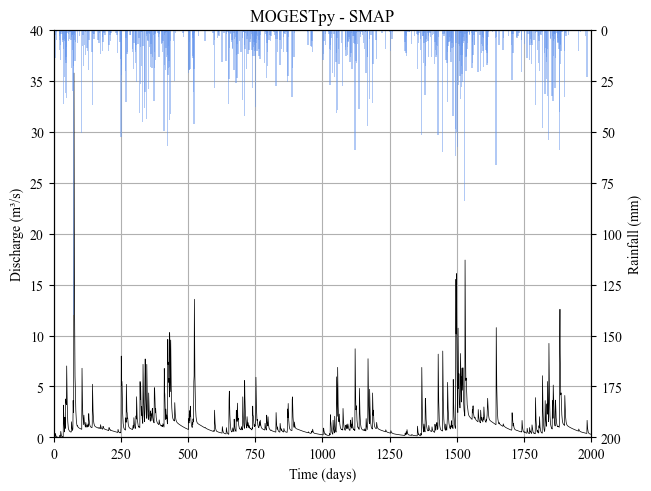

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

fig, ax = plt.subplots(constrained_layout=True)
ax.grid(True)

x_axis = [i for i in range(len(df))]

ax.set_xlim(0, 2000)
ax.set_ylim(0, 40)

ax.set_xlabel('Time (days)')
ax.set_ylabel('Discharge (m³/s)')

prec = ax.twinx()
prec.bar(x_axis, df['P'], color='cornflowerblue', width=5, zorder=1, alpha=.5)
prec.set_ylim(0,200)
prec.invert_yaxis()
prec.set_ylabel('Rainfall (mm)')
ax.plot(x_axis, df['Q'], color='black', linewidth=.5, zorder=2)
ax.set_title('MOGESTpy - SMAP')

plt.show()

The `run_to_dataframe()` method returns a pandas dataframe with the results of the simulation.

In [7]:
df_smap = smap_biritiba.run_to_dataframe(
    df['P'].values,
    df['ET'].values
)
display(df_smap)

,prec,etp,Rsolo,Rsub,Rsup,Tu,Es,Er,Rec,Ed,Eb,discharge
0,0.000000,5.266667,4.736667,0.000000,0.000000,0.050000,0.000000,0.263333,0.000000,0.000000,0.000000,0.000000
1,0.000000,5.266667,4.487202,0.000000,0.000000,0.047367,0.000000,0.249464,0.000000,0.000000,0.000000,0.000000
2,0.000000,5.266667,4.250876,0.000000,0.000000,0.044872,0.000000,0.236326,0.000000,0.000000,0.000000,0.000000
3,0.400000,5.266667,4.044000,0.000000,0.000000,0.042509,0.000000,0.606876,0.000000,0.000000,0.000000,0.000000
4,4.200000,5.266667,3.998870,0.000000,0.049309,0.040440,0.049309,4.195821,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2118,0.000000,3.233333,30.743298,12.954494,0.127138,0.318929,0.000000,1.031204,0.118401,0.079253,0.188557,0.217595
2119,0.000000,3.233333,29.704448,12.811770,0.078318,0.307433,0.000000,0.994033,0.044818,0.048820,0.187541,0.192044
2120,0.000000,3.233333,28.744004,12.626295,0.048244,0.297044,0.000000,0.960444,0.000000,0.030074,0.185475,0.175133
2121,1.086667,3.233333,28.126966,12.443505,0.029719,0.287440,0.000000,1.703705,0.000000,0.018525,0.182790,0.163569


The SMAP module has two methods for calibrating the model parameters: `calibrate()` and `pso_calibrate()`. The first method uses the scipy library to perform an optimization of the model parameters using the `differential evolution` algorithm. The second method uses the `pyswarms` library to perform a particle swarm optimization of the model parameters. The `calibrate()` method is faster than the `pso_calibrate()`.

In [8]:
smap_biritiba.calibrate(
    df['P'].values,
    df['ET'].values,
    df['Q'].values,
    variables=['Str', 'k2t', 'Crec'],
    disp=True
)

differential_evolution step 1: f(x)= -0.9123756225797464
differential_evolution step 2: f(x)= -0.9123756225797464
differential_evolution step 3: f(x)= -0.9132872287383988
differential_evolution step 4: f(x)= -0.9132872287383988
differential_evolution step 5: f(x)= -0.977547190424444
differential_evolution step 6: f(x)= -0.977547190424444
differential_evolution step 7: f(x)= -0.977547190424444
differential_evolution step 8: f(x)= -0.977547190424444
differential_evolution step 9: f(x)= -0.9913647618268967
differential_evolution step 10: f(x)= -0.991708457050564
differential_evolution step 11: f(x)= -0.991708457050564
differential_evolution step 12: f(x)= -0.991708457050564
differential_evolution step 13: f(x)= -0.991708457050564
differential_evolution step 14: f(x)= -0.9927013023935345
differential_evolution step 15: f(x)= -0.9935099944824253
differential_evolution step 16: f(x)= -0.9960952259604886
differential_evolution step 17: f(x)= -0.9975446650691431
differential_evolution step 18:

             message: Optimization terminated successfully.
             success: True
                 fun: -0.9994676450616229
                   x: [ 1.056e+02  1.335e+00  1.979e+01]
                 nit: 19
                nfev: 932
          population: [[ 1.056e+02  1.329e+00  1.979e+01]
                       [ 1.080e+02  1.296e+00  1.830e+01]
                       ...
                       [ 1.067e+02  1.350e+00  1.932e+01]
                       [ 1.101e+02  1.293e+00  1.792e+01]]
 population_energies: [-9.995e-01 -9.915e-01 ... -9.930e-01 -9.917e-01]
                 jac: [ 1.869e-04 -2.192e-05 -1.891e-05]

In [16]:
smap_biritiba.pso_calibrate(
    prec_arr=df['P'].values.tolist(),
    etp_arr=df['ET'].values.tolist(),
    eval_arr=df['Q'].values.tolist(),
    variables=['k2t', 'Str', 'Crec'],
    n_particles=100,
    iters=200,
)

2025-05-29 21:58:00,322 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Lower bounds: (0.2, 100, 0), Upper bounds: (10, 2000, 20)


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-.956
2025-05-29 22:04:17,568 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9559511781141229, best pos: [  1.30598859 100.93606892  18.92325147]


{'best_cost': np.float64(-0.9559511781141229),
 'best_params': {'k2t': np.float64(1.3059885869542882),
  'Str': np.float64(100.93606892181879),
  'Crec': np.float64(18.923251471203315)}}

In [10]:
df['Q_PSO'] = smap_biritiba.run_to_list(
    df['P'].values,
    df['ET'].values
)

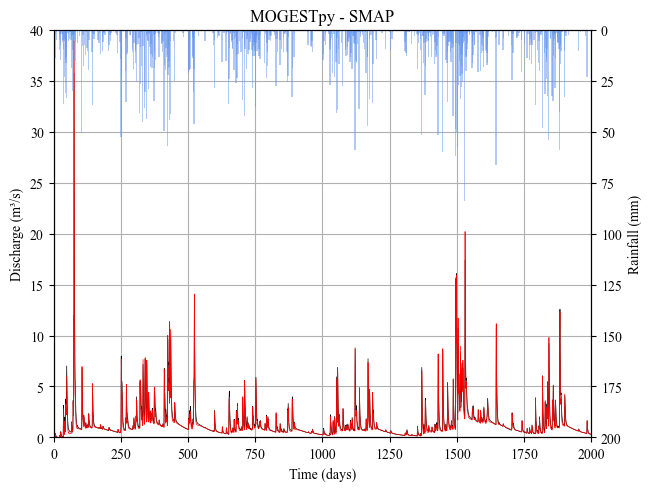

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

fig, ax = plt.subplots(constrained_layout=True)
ax.grid(True)

x_axis = [i for i in range(len(df))]

ax.set_xlim(0, 2000)
ax.set_ylim(0, 40)

ax.set_xlabel('Time (days)')
ax.set_ylabel('Discharge (m³/s)')

prec = ax.twinx()
prec.bar(x_axis, df['P'], color='cornflowerblue', width=5, zorder=1, alpha=.5)
prec.set_ylim(0,200)
prec.invert_yaxis()
prec.set_ylabel('Rainfall (mm)')
ax.plot(x_axis, df['Q'], color='black', linewidth=.5, zorder=2)
ax.plot(x_axis, df['Q_PSO'], color='red', linewidth=.5, zorder=3)
ax.set_title('MOGESTpy - SMAP')
plt.show()

Using SALib to perform a sensitivity analysis on the model parameters

In [12]:
from SALib.sample import sobol as sobol_s
from SALib.analyze import sobol as sobol_a
import numpy as np
analysis = True
if analysis:
    # Define the problem for SALib
    problem = {
        'num_vars': 6,
        'names': ['k2t', 'Str', 'Crec', 'kkt', 'Capc', 'Ai'],
        'bounds': [
            [0.2, 10],  # Example bounds for k2t
            [100, 2000],  # Example bounds for Str
            [0, 20],  # Example bounds for Crec
            [30, 180],  # Example bounds for kkt
            [30, 50],  # Example bounds for Capc
            [2, 5]  # Example bounds for Ai
        ]
    }

    # Generate samples
    param_values = sobol_s.sample(problem, 512, calc_second_order=False)

    # Prepare input arrays
    P = df['P'].values[:365]
    ET = df['ET'].values[:365]

    # Run the model for each sample
    Y = []
    for params in param_values:
        smap_biritiba.k2t, smap_biritiba.Str, smap_biritiba.Crec, smap_biritiba.kkt, smap_biritiba.Capc, smap_biritiba.Ai = params
        discharge_sim = smap_biritiba.run_to_list(P, ET)
        # Use Nash-Sutcliffe Efficiency as objective (or any other metric)
        obs = df['Q'].values[:365]
        nse = 1 - np.sum((obs - discharge_sim) ** 2) / np.sum((obs - np.mean(obs)) ** 2)
        Y.append(nse)

    Y = np.array(Y)

    # Perform Sobol sensitivity analysis
    Si = sobol_a.analyze(problem, Y, calc_second_order=False)
    print("Sobol Sensitivity Indices:")
    for name, s1 in zip(problem['names'], Si['S1']):
        print(f"{name}: {s1:.4f}")

Sobol Sensitivity Indices:
k2t: 0.1496
Str: 0.7824
Crec: 0.0024
kkt: 0.0073
Capc: 0.0074
Ai: 0.0002


c:\Users\dario\miniconda3\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


In [13]:
display(pd.DataFrame(problem))

,num_vars,names,bounds,sample_scaled
0,6,k2t,"[0.2, 10]",True
1,6,Str,"[100, 2000]",True
2,6,Crec,"[0, 20]",True
3,6,kkt,"[30, 180]",True
4,6,Capc,"[30, 50]",True
5,6,Ai,"[2, 5]",True


In [14]:
display(pd.DataFrame(Si))

,S1,S1_conf,ST,ST_conf
0,0.149630,0.052375,0.194848,0.034210
1,0.782428,0.118884,0.850956,0.099638
2,0.002372,0.010880,0.007045,0.001781
3,0.007262,0.011353,0.007472,0.001268
4,0.007444,0.012819,0.009338,0.002270
5,0.000246,0.002356,0.000421,0.000071


## Iteractive model run

In [15]:
from ipywidgets import interact, FloatSlider

@interact(
    Str=FloatSlider(min=100, max=2000, step=0.1, value=100),
    Crec=FloatSlider(min=0, max=20, step=0.1, value=19.612562479845),
    Capc=FloatSlider(min=30, max=50, step=0.1, value=30/100),
    kkt=FloatSlider(min=30, max=180, step=0.1, value=47.5320152819107),
    k2t=FloatSlider(min=0.2, max=10, step=0.1, value=1.43064763229058),
    Ai=FloatSlider(min=2, max=5, step=0.1, value=2),
    Tuin=FloatSlider(min=0, max=1, step=0.1, value=.05),
    Ebin=FloatSlider(min=0, max=100, step=0.1, value=0),
)
def func(Str, Crec, Capc, kkt, k2t, Ai, Tuin, Ebin):
    smap_biritiba = Smap(
        Str=Str,
        Crec=Crec,
        Capc=Capc,
        kkt=kkt,
        k2t=k2t,
        Ai=Ai,
        Tuin=Tuin,
        Ebin=Ebin,
        Ad=70.2
    )
    

    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = ['Times New Roman']

    fig, ax = plt.subplots(constrained_layout=True)
    ax.grid(True)

    x_axis = [i for i in range(len(df))]

    ax.set_xlim(0, 2000)
    ax.set_ylim(0, 40)

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Discharge (m³/s)')

    prec = ax.twinx()
    prec.bar(x_axis, df['P'], color='cornflowerblue', width=5, zorder=1, alpha=.5)
    prec.set_ylim(0,200)
    prec.invert_yaxis()
    prec.set_ylabel('Rainfall (mm)')
    ax.plot(x_axis,
            smap_biritiba.run_to_list(
                df['P'].values,
                df['ET'].values
            ),
            color='black', linewidth=.5, zorder=2)
    ax.set_title('MOGESTpy - SMAP - Interactive')
    plt.show()

    return fig, ax


interactive(children=(FloatSlider(value=100.0, description='Str', max=2000.0, min=100.0), FloatSlider(value=19…

In [21]:
import random


In [22]:
random.famoso()

AttributeError: module 'random' has no attribute 'famoso'

In [19]:
# Enable automatic reloading of modules upon modification
%load_ext autoreload
%autoreload 2